#**EXPLORATORY DATA ANALYSIS AND FEATURE ENGINEERING ON DIABETES RISK FACTORS DATA**

## **INTRODUCTION**

This project aims to perform essential feature engineering and exploratory data analysis techniques on a raw dataset containing certain risk factors that may be associated with diabetes to identify important features that may be crucial for important machine learning models. 

Diabetes is a chronic disease and a major challenge across the world. Hence, identifying factors associated with disease is very important. Accurate and fast diagnosis/prediction of the disease will help us to avoid any future complications associated with diabetes. 

This dataset contains information from from the National Institute of Diabetes and Digestive and Kidney Diseases. This dataset helps to predict the onset of diabetes based on diagnostic measures. 

This Dataset comes from **diabetes_mandatory_EDA.xlsx"** which has 768 rows and  9 columns.

This dataset contains following variables(columns):


*   **Pregnancies**: Number of times pregnancy has been observed
*   **Glucose**: Plasma glucose concentration after 2 hours in an oral glucose tolerance test

*   **Blood Pressure**: Diastolic blood pressure (mm Hg) observed
*   **Skin Thickness**: Triceps skin fold thickness (mm) is measured from the triceps.

*   **Insulin**: 2-Hour serum insulin (mu U/ml) is insulin level measured after eating. It is used to assess how an individual processes glucose and how the insulin in the body responds to those glucose levels.

*   **BMI**: Body mass index (weight in kg/(height in m)^2). Body mass index is a value derived from the mass and height of a person. The BMI is defined as the body mass divided by the square of the body height, and is expressed in units of kg/m², resulting from mass in kilograms and height in metres. 

*   **Diabetes Pedigree Function**: This variable indicates the function which scores likelihood of diabetes based on family history.
*   **Age**: Age in years. This variable indicates the age of the person

*   **Outcome**: Class variable (0 or 1) 0 mean non-diabetic and 1 means diabetic. This variable indicates whether person had a diabetes or not.

## **OBJECTIVE**

The objective of this enquiry is to **perform essential feature engineering and exploratory data analysis techniques to identify important features** that may be crucial for important machine learning models and  answer some questions.


## **BASIC EXPLORATION OF DATA**

In basic exploration of data, we will do the following:

  - we will first import all required libraries
  - then upload the dataset.
  - look at number of rows and columns
  - look at first 5 rows and last 5 rows of the dataset
  - reset column names and datatypes
  - look at dataset information (info() and describe())



In [1]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # plt is an abbreviation of pyplot
import seaborn as sns
import missingno as msno
import math

In [2]:
# importing file from a local folder
from google.colab import files
uploaded = files.upload()

Saving diabetes_mandatory_EDA.xlsx to diabetes_mandatory_EDA.xlsx
Saving Variables_diabetes_EDA.xlsx to Variables_diabetes_EDA.xlsx


In [3]:
# reading column names from excel file
var = pd.read_excel('Variables_diabetes_EDA.xlsx')

# reading the excel file into a pandas dataframe
diabetes_data= pd.read_excel('diabetes_mandatory_EDA.xlsx', header=None, names=var["Variables used"] )

In [4]:
# looking at number of rows and columns
diabetes_data.shape

(768, 9)

**This dataset has 768 rows and 9 columns**

In [5]:
# renaming some columns 
diabetes_data = diabetes_data.rename(columns={
    'Blood Pressure':'Blood_Pressure',
    'Skin Thickness':'Skin_Thickness',
    'Diabetes Pedigree Function':'Diabetes_Pedigree_Function'
})

In [6]:
# looking at top 5 rows of dataset
diabetes_data.head()

,Pregnancies,Glucose,Blood_Pressure,Skin_Thickness,Insulin,BMI,Diabetes_Pedigree_Function,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0


In [7]:
# looking at last 5 rows of dataset
diabetes_data.tail()

,Pregnancies,Glucose,Blood_Pressure,Skin_Thickness,Insulin,BMI,Diabetes_Pedigree_Function,Age,Outcome
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0.0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0,0.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0.0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0,1.0
767,1.0,93.0,70.0,31.0,0.0,30.4,0.315,23.0,0.0


In [8]:
# looking at the statistical information about the attributes
diabetes_data.describe()

,Pregnancies,Glucose,Blood_Pressure,Skin_Thickness,Insulin,BMI,Diabetes_Pedigree_Function,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


These columns should not have zero value: **Glucose, Blood_Pressure, Skin_Thickness, Insulin and BMI**. Because these attributes are never found as zero in real world scenario.

Zero should be replaced with NaN for now so that it doesnot deviate statistical measures of these columns.

In [9]:
diabetes_data1 = diabetes_data.copy(deep = True)
diabetes_data[['Glucose','Blood_Pressure','Skin_Thickness','Insulin','BMI']] = diabetes_data1[['Glucose','Blood_Pressure','Skin_Thickness','Insulin','BMI']].replace(0,np.NaN)

In [10]:
# looking at information regarding attributes
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Pregnancies                 768 non-null    float64
 1   Glucose                     763 non-null    float64
 2   Blood_Pressure              733 non-null    float64
 3   Skin_Thickness              541 non-null    float64
 4   Insulin                     394 non-null    float64
 5   BMI                         757 non-null    float64
 6   Diabetes_Pedigree_Function  768 non-null    float64
 7   Age                         768 non-null    float64
 8   Outcome                     768 non-null    float64
dtypes: float64(9)
memory usage: 54.1 KB


All attributes are of datatype float64

In [11]:
# looking at number of unique values
diabetes_data.nunique()

Pregnancies                    17
Glucose                       135
Blood_Pressure                 46
Skin_Thickness                 50
Insulin                       185
BMI                           247
Diabetes_Pedigree_Function    517
Age                            52
Outcome                         2
dtype: int64

## **EXPLORATORY DATA ANALYSIS**

### **I. UNIVARIABLE ANALYSIS**


**(i) Explore numerical column data:**
  - Draw histogram for numerical column data

**(ii) Explore categorical columns:**
  - Draw countplot for categorical columns
  
**(iii) Check for irregularities in dataset:**
  - Missing values
  - Erroneous/wrong values
  - Skewed data and outliers

Based on the exploration we will decide *if we want to do data cleaning first or go ahead with further data analysis ( bivariate and multivariate analysis)*

#### **(i) Explore numerical column data**

In [12]:
# defining a function that takes input - one dataframe and multiple names of numerical columns
# for each numerical column histogram (with density) with mean and median is plotted

def numerical_distribution(df,*var):
    #looping through columns one by one
    for i in var:
        plt.figure(figsize=(10,4))    #setting figure size
        plt.title(f'Distribution of {i} data', fontsize=15)   #setting title
        sns.histplot(df,x=i, color='grey', kde=True)          # plotting histogram with density
        plt.axvline(df[i].mean(), color='r', label='Mean')    # setting mean axis line
        plt.axvline(df[i].median(), color='b',label='Median') # setting median axis line
        plt.legend()                                          # keeping legend for mean, median
        plt.show()    # output

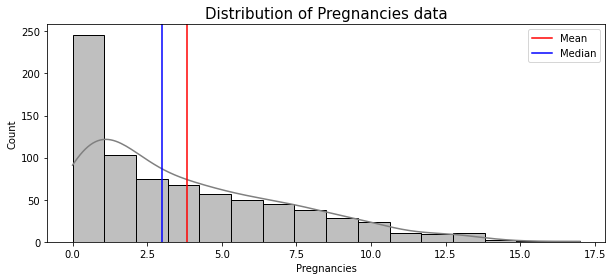

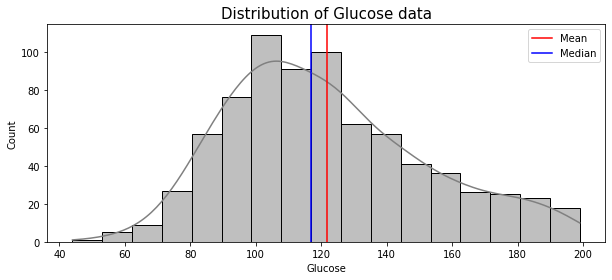

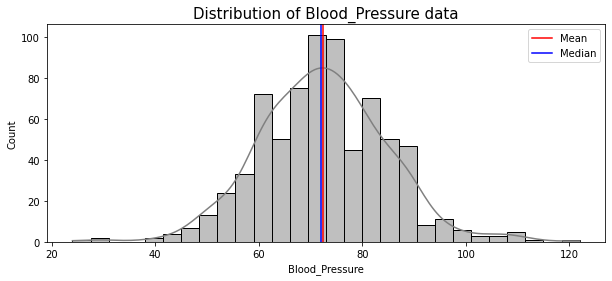

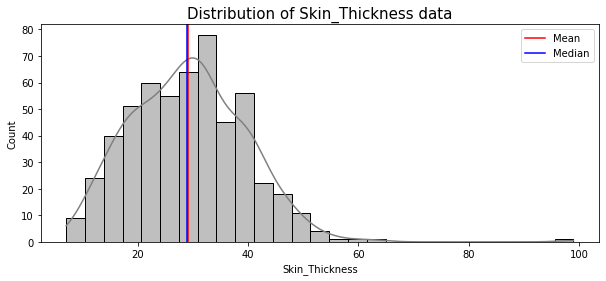

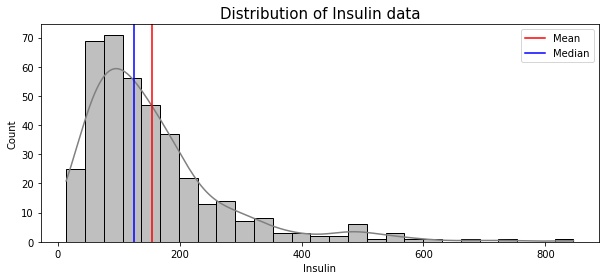

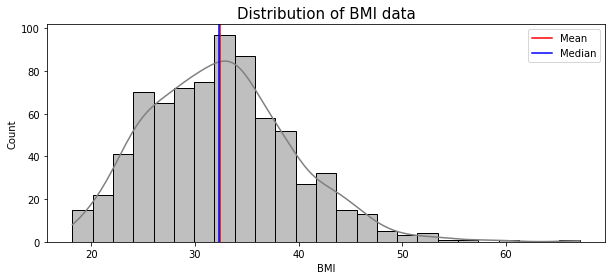

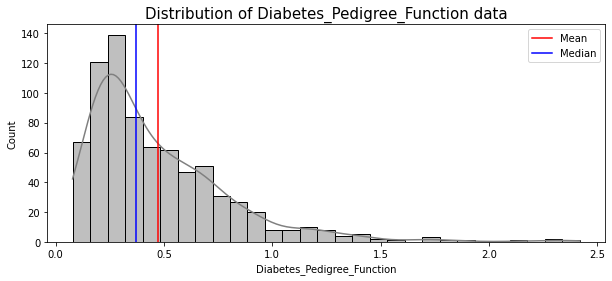

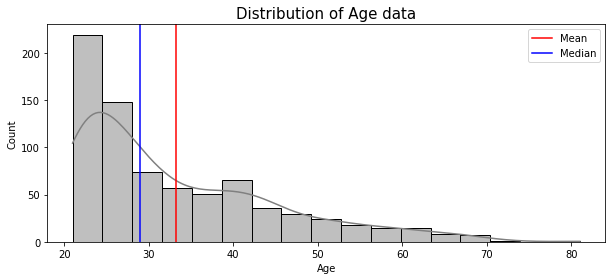

In [13]:
# plotting histogram with density for all columns except Outcome
numerical_distribution(diabetes_data, 'Pregnancies', 'Glucose', 'Blood_Pressure', 'Skin_Thickness', 'Insulin',
       'BMI', 'Diabetes_Pedigree_Function', 'Age')

#### **(ii) Explore categorical columns:**

Only one column - 'Outcome' is a categorical column.

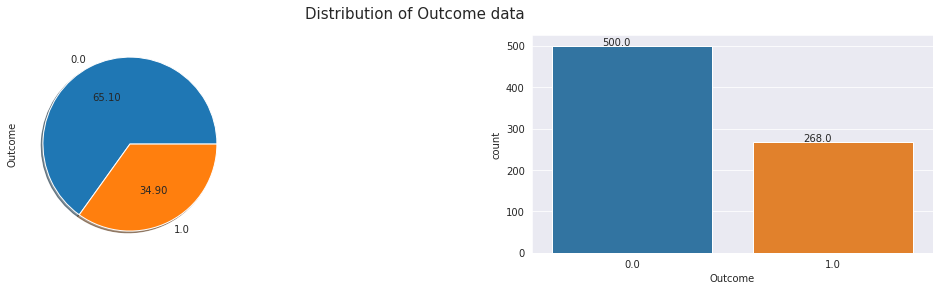

In [14]:
# plotting countplot and piechart for the categorical column 'Outcome'
sns.set_style('darkgrid')
fig, ax = plt.subplots(nrows = 1 , ncols = 2 , figsize = (18,4))  # setting 2 plots for 1 column
fig.suptitle(f'Distribution of Outcome data', fontsize=15)  # heading for single categorical column

# left side plot will be a pie chart
diabetes_data["Outcome"].value_counts().plot(kind='pie', autopct = '%.2f', shadow = True, ax=ax[0])

#  right side plot will be a countplot
sns.countplot(x=diabetes_data["Outcome"],ax=ax[1])
        
#displaying the count value for a category
for p in ax[1].patches:
  ax[1].annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

# space between two plots
plt.subplots_adjust(wspace=0.5) 
plt.show()

In outcome column we have: **268 diabetic (1.0) and 500 Non-diabetic (0.0) outcomes**

#### **(iii) Check for irregularities in dataset**

##### **1. Checking for missing values**

In [15]:
# looking for missing values in all columns
diabetes_data.isna().sum()

Pregnancies                     0
Glucose                         5
Blood_Pressure                 35
Skin_Thickness                227
Insulin                       374
BMI                            11
Diabetes_Pedigree_Function      0
Age                             0
Outcome                         0
dtype: int64

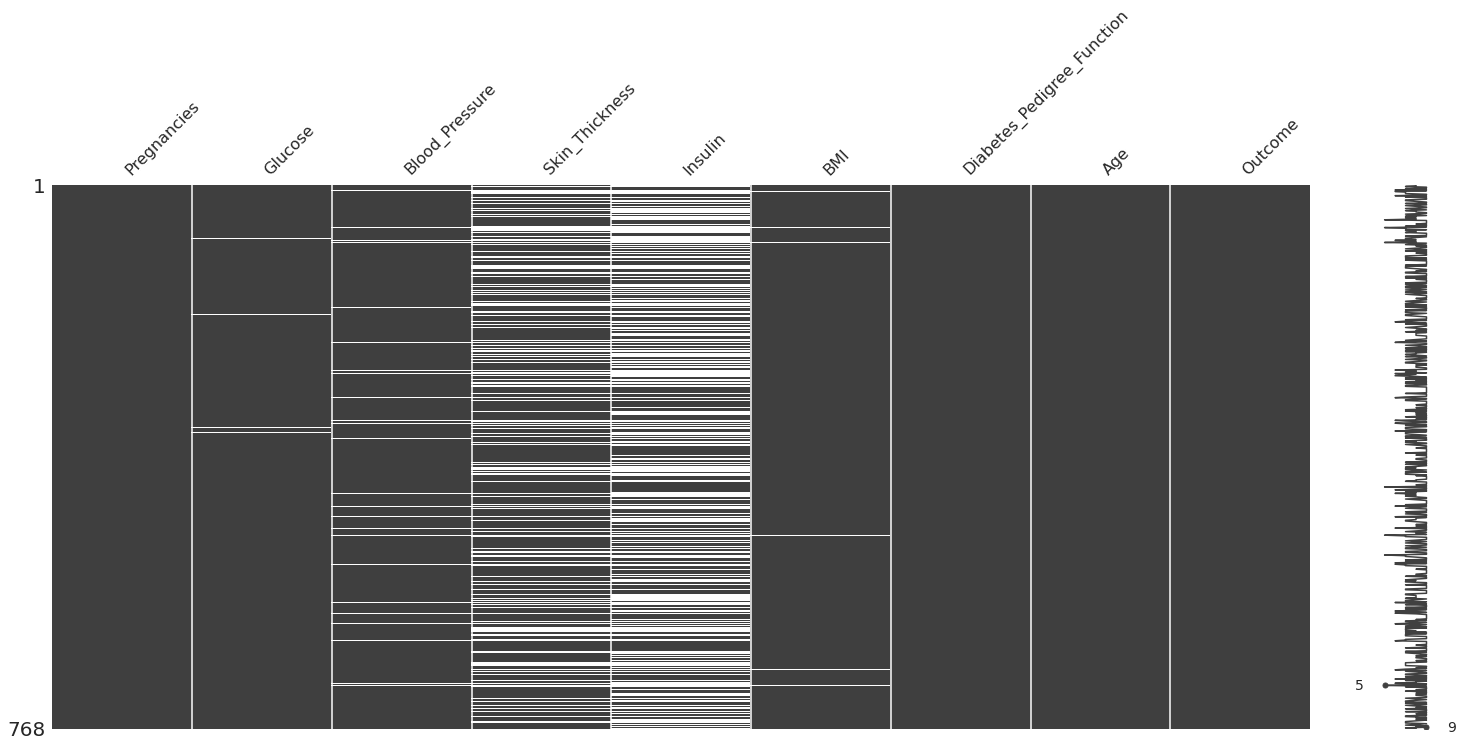

In [16]:
# creating matrix plot to see the pattern in missing values 
# black represent non-missing values
# white space in graph denotes missing data
msno.matrix( diabetes_data )

Before replacing missing values, we will check skewness of the columns

In [17]:
# checking for manual skewness values in the dataset
skewness_values = diabetes_data.skew()
skewness_values

Pregnancies                   0.901674
Glucose                       0.530989
Blood_Pressure                0.134153
Skin_Thickness                0.690619
Insulin                       2.166464
BMI                           0.593970
Diabetes_Pedigree_Function    1.919911
Age                           1.129597
Outcome                       0.635017
dtype: float64

**Symmetrical data or normally distributed**:
*   Blood_Pressure

**Moderately skewed data**:
*   Pregnancies
*   Glucose
*   Skin_Thickness
*   BMI

**Highly Skewed data**:
*   Insulin
*   Diabetes_Pedigree_Function
*   Age

Only Glucose, BloodPressure, SkinThickness, Insulin and BMI have missing values.

Only blood pressure is normally distributed. Glucose, SkinThickness, Insulin and BMI have skewed data distribution.

In [18]:
# replacing missing values of normally distributed data with mean
diabetes_data["Blood_Pressure"].fillna(diabetes_data["Blood_Pressure"].mean(), inplace=True)

In [19]:
# replacing missing values of skewed data with median

diabetes_data["Glucose"].fillna(diabetes_data["Glucose"].median(), inplace=True)
diabetes_data["BMI"].fillna(diabetes_data["BMI"].median(), inplace=True)


diabetes_data["Skin_Thickness"].fillna(diabetes_data["Skin_Thickness"].median(), inplace=True)
diabetes_data["Insulin"].fillna(diabetes_data["Insulin"].median(), inplace=True)


##### **2.Skewed data and outliers**

In [20]:
# checking for manual skewness values in the dataset
skewness_values = diabetes_data.skew()
skewness_values

Pregnancies                   0.901674
Glucose                       0.535587
Blood_Pressure                0.137305
Skin_Thickness                0.837608
Insulin                       3.380019
BMI                           0.599233
Diabetes_Pedigree_Function    1.919911
Age                           1.129597
Outcome                       0.635017
dtype: float64

The skewness values for the numerical columns are:
- Pregnancies                  : 0.901674
- Glucose                       : 0.535587
- Blood_Pressure               :   0.137305
- Skin_Thickness                : 0.690619
- Insulin                       : 2.166
- BMI                          :  0.599233
- Diabetes_Pedigree_Function    : 1.919911
- Age                           : 1.129597
- Outcome                       : 0.635017


**Symmetrical data or normally distributed**:
*   Blood_Pressure

**Moderately skewed data**:
*   Pregnancies
*   Glucose
*   Skin_Thickness
*   BMI

**Highly Skewed data**:
*   Insulin
*   Diabetes_Pedigree_Function
*   Age


In [21]:
diabetes_data.describe()

,Pregnancies,Glucose,Blood_Pressure,Skin_Thickness,Insulin,BMI,Diabetes_Pedigree_Function,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.405184,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096346,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [22]:
def get_outliers_boxplot(df, *var):
  #looping through columns one by one
    for col in var:
        plt.figure(figsize=(10,4))    #setting figure size
        plt.title(f'Distribution of {col} data', fontsize=15)   #setting title
        sns.boxplot(x=df[col], showmeans=True)          # plotting histogram with density
        plt.show()    # output
        Q1 = np.percentile(df[col], 25, interpolation = 'midpoint')
        Q2 = np.percentile(df[col], 50, interpolation = 'midpoint')  
        Q3 = np.percentile(df[col], 75, interpolation = 'midpoint')
        IQR = Q3 - Q1
        #print(f'Interquartile range for {col} is', IQR)
        low_lim = Q1 - 1.5 * IQR
        up_lim = Q3 + 1.5 * IQR
        #print('low_limit is', low_lim)
        #print('up_limit is', up_lim)
        outlier =[]
        for x in df[col]:
          if ((x> up_lim) or (x<low_lim)):
              outlier.append(x)
        print("\n")
        print(f'number of outliers in {col} data is', len(outlier), "\n")
        #print(f'outlier in the {col} is', outlier)
        print("---------------------------------------------------------\n")


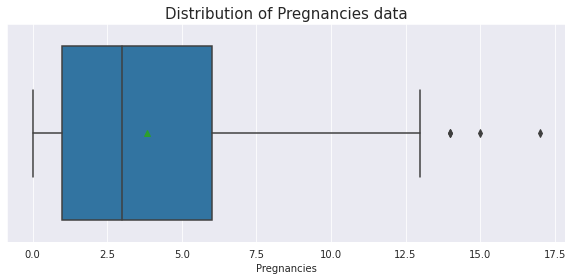



number of outliers in Pregnancies data is 4 

---------------------------------------------------------



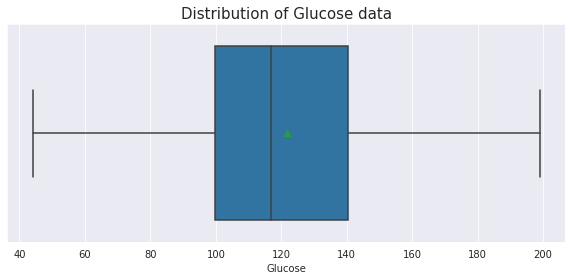



number of outliers in Glucose data is 0 

---------------------------------------------------------



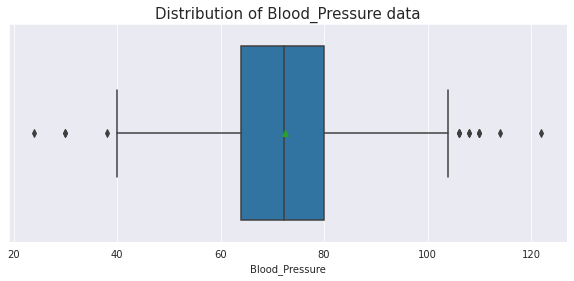



number of outliers in Blood_Pressure data is 14 

---------------------------------------------------------



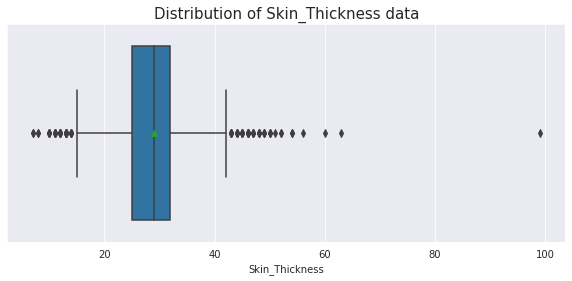



number of outliers in Skin_Thickness data is 87 

---------------------------------------------------------



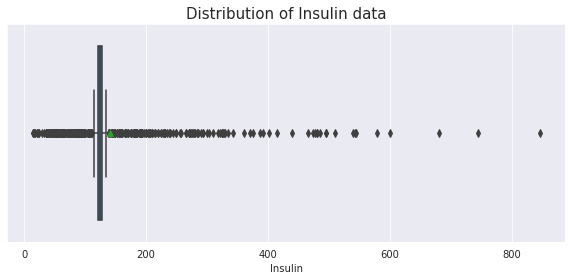



number of outliers in Insulin data is 345 

---------------------------------------------------------



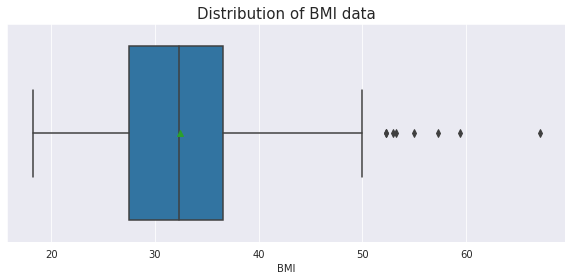



number of outliers in BMI data is 8 

---------------------------------------------------------



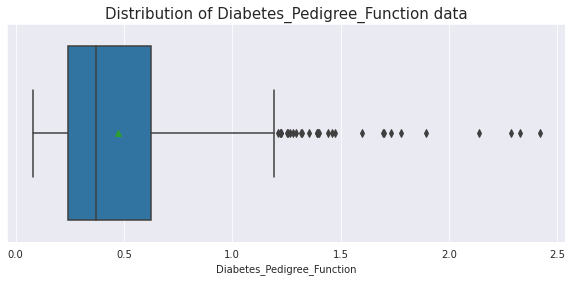



number of outliers in Diabetes_Pedigree_Function data is 29 

---------------------------------------------------------



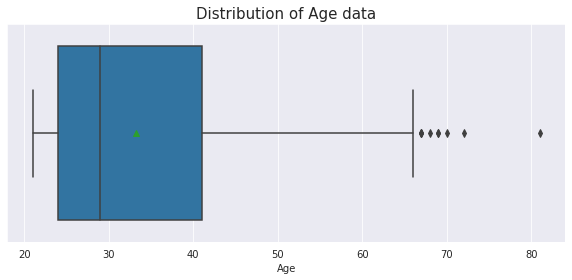



number of outliers in Age data is 9 

---------------------------------------------------------



In [23]:
# plotting boxplot for all columns except Outcome
get_outliers_boxplot(diabetes_data, 'Pregnancies', 'Glucose', 'Blood_Pressure', 'Skin_Thickness', 'Insulin',
       'BMI', 'Diabetes_Pedigree_Function', 'Age')

The outliers are not going to be removed because they might contain real-world data which will help in building a realistic model.

So, we are keeping the outliers.

### **II. BIVARIABLE ANALYSIS**

#### **(i) Numerical Data - Numerical data relation analysis**

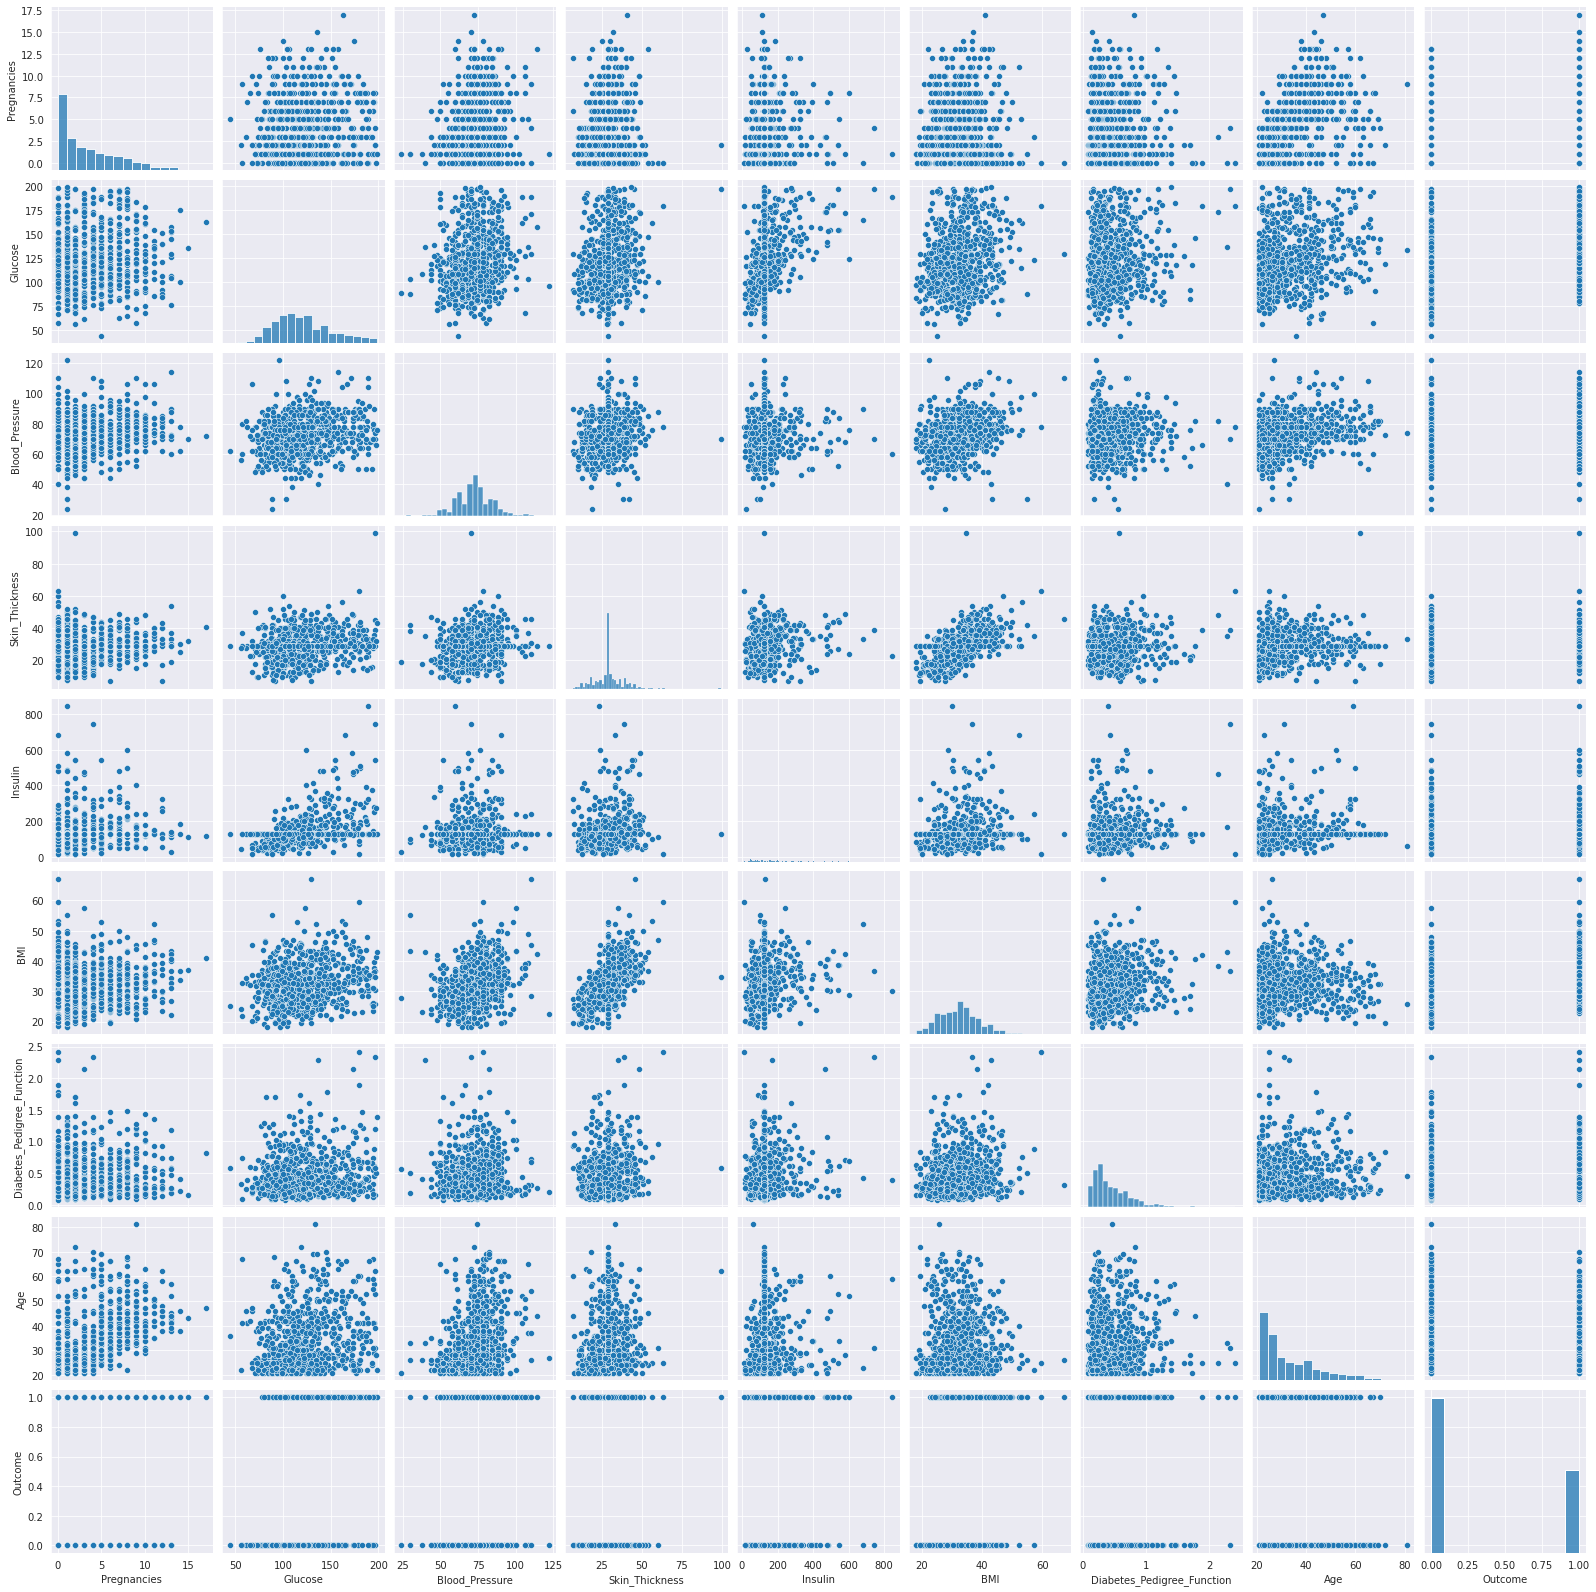

In [24]:
# drawing pairplot to see overview of all numerical - numerical data relationship
sns.pairplot(diabetes_data)
plt.show()

Out of all these plots, these plots had intresting pattern and could be explored further:
- Pregnancies vs Age
- skin thickness and bmi
- insulin and glucose

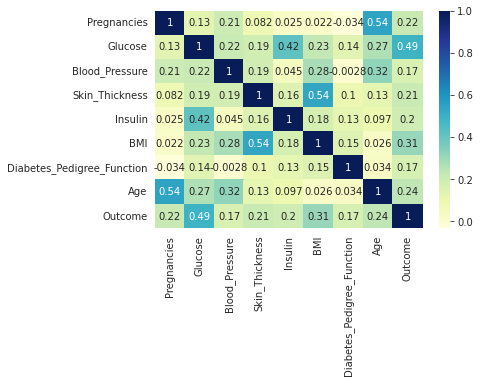

In [25]:
# plotting correlation heatmap
dataplot = sns.heatmap(diabetes_data.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

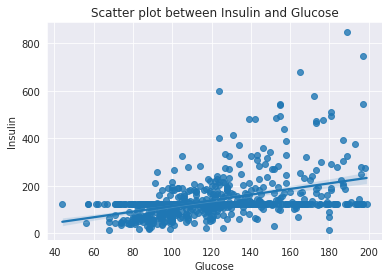

In [26]:
# scatter plot between glucose and insulin
sns.regplot(x= "Glucose", y= "Insulin", data = diabetes_data)
plt.title("Scatter plot between Insulin and Glucose")
plt.grid(True)

Insulin is positively correlated with Glucose. **As Glucose increases, Insulin also increases** or vice-versa.


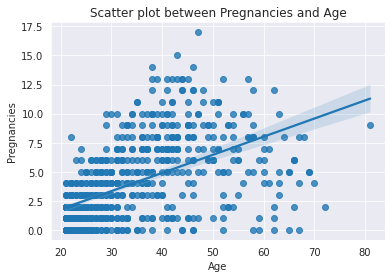

In [27]:
# scatter plot between Pregnancies and Age
sns.regplot(x= "Age", y= "Pregnancies", data = diabetes_data)
plt.title("Scatter plot between Pregnancies and Age")
plt.grid(True)

Pregnancies is positively correlated with age. **As Age increases, pregnancies increases**.

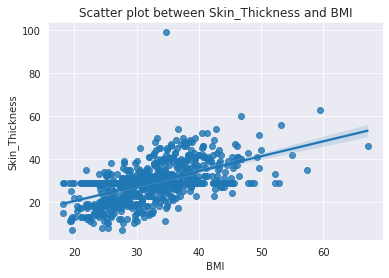

In [28]:
# scatter plot between Skin_Thickness and BMI
sns.regplot(x= "BMI", y= "Skin_Thickness", data = diabetes_data)
plt.title("Scatter plot between Skin_Thickness and BMI")
plt.grid(True)

Skin thickness is positively correlated with BMI. **As BMI increases, Skin Thickness also increases** or vice-versa.

#### **(ii) Categorical Data - Numerical data relation analysis**

Plotting boxplot for all numerical columns vs 'Outcome' variable

In [29]:
# boxplot for all  combination of numerical data - categorical data
def catnum_boxplot(df, num_cols, cat):
  for num in num_cols:
        
        plt.rcParams["figure.figsize"] = [12.00, 6.00]
        plt.rcParams["figure.autolayout"] = True
        
        sns.boxplot(x = cat, y = num, data = diabetes_data)

        plt.xlabel(cat)
        plt.ylabel(num)
        plt.title(f"Boxplot of {num} with {cat} data")
        
        plt.show()    # output
        print("\n----------------------------------------------------------------\n")

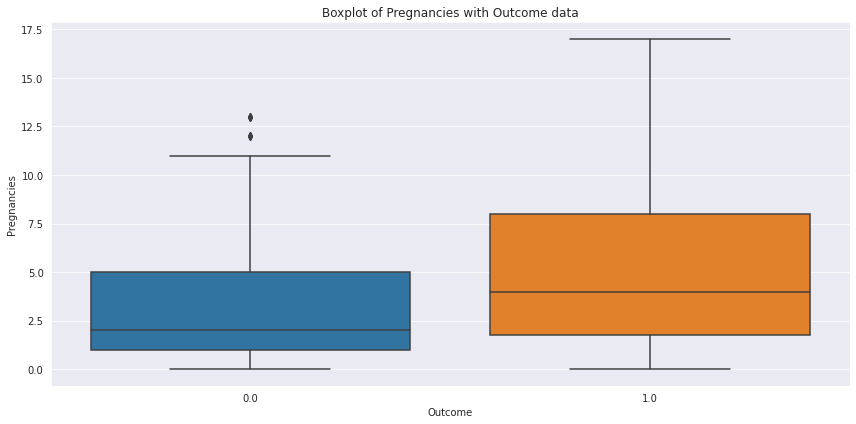


----------------------------------------------------------------



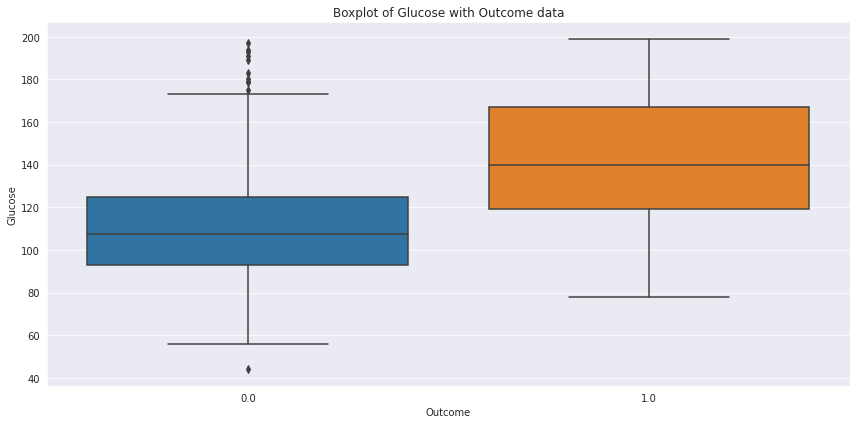


----------------------------------------------------------------



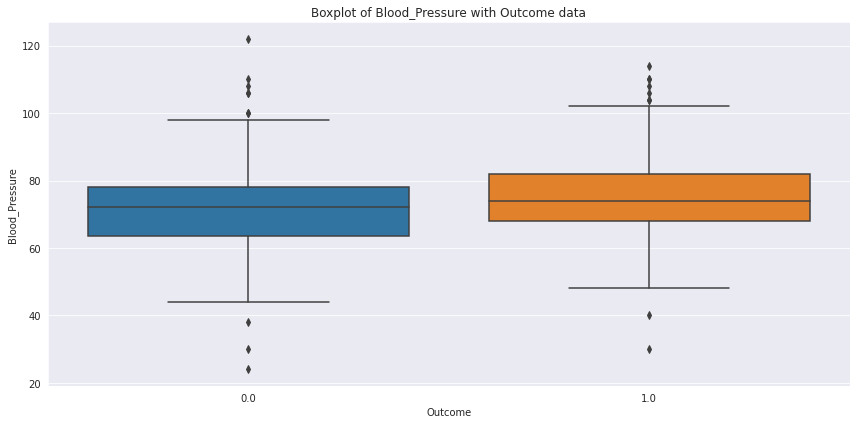


----------------------------------------------------------------



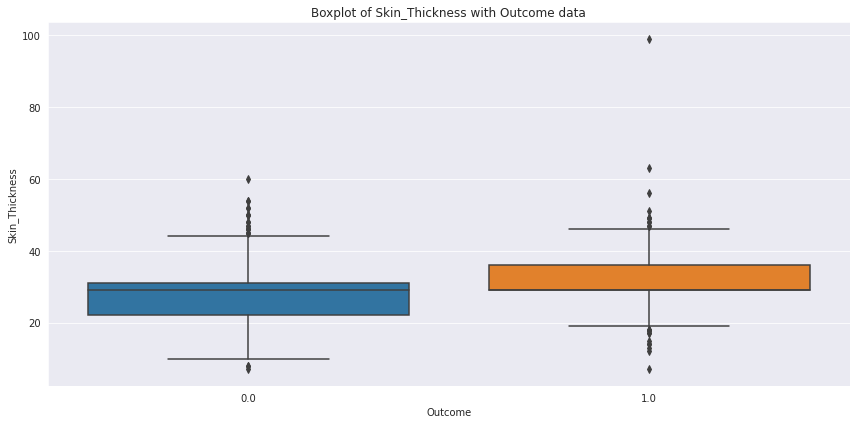


----------------------------------------------------------------



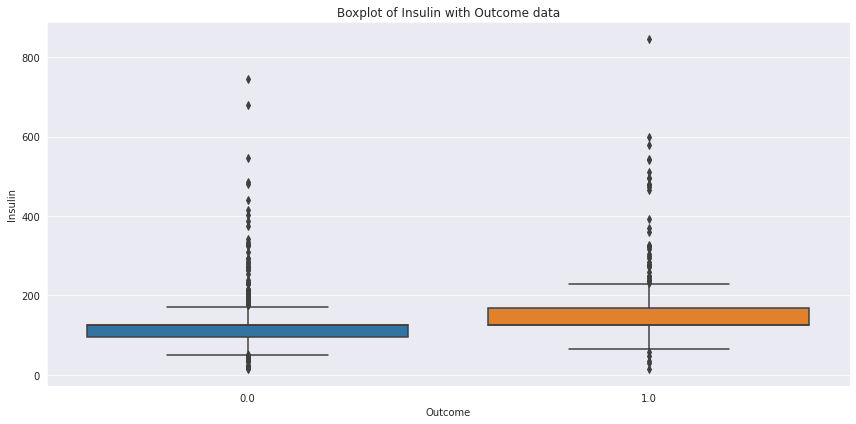


----------------------------------------------------------------



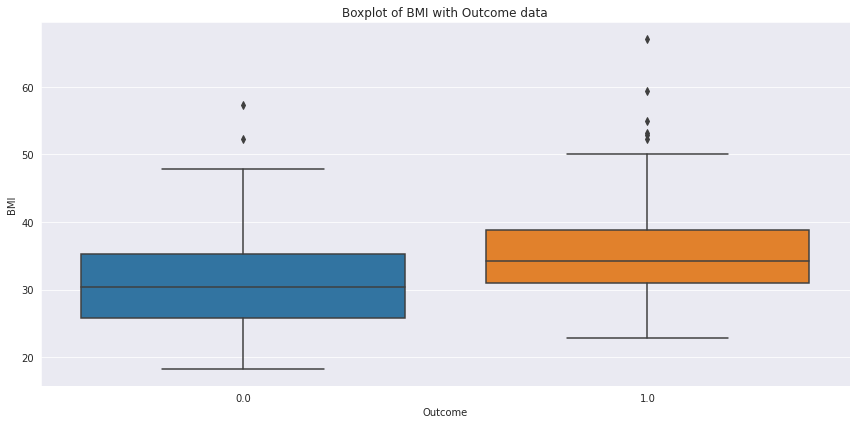


----------------------------------------------------------------



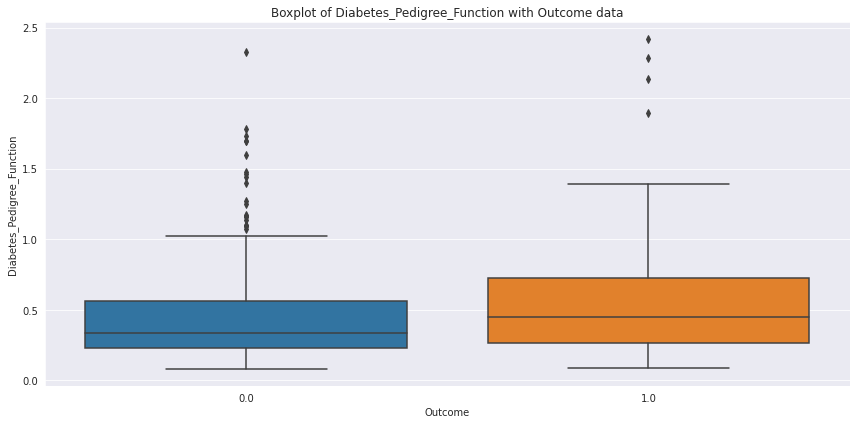


----------------------------------------------------------------



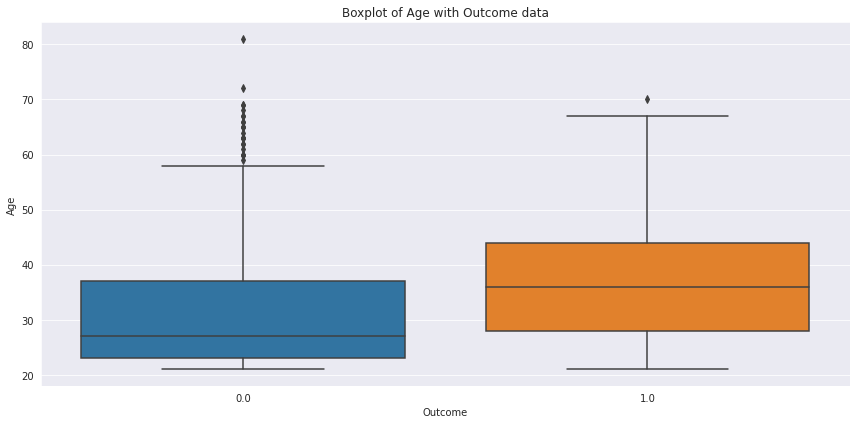


----------------------------------------------------------------



In [30]:
catnum_boxplot(diabetes_data, list(diabetes_data.columns[:-1]), "Outcome")

In outcome variable- 0 mean non-diabetic and 1 means diabetic

Interpretation from boxplots:

- diabetic outcomes have higher median Pregnancies than non-diabetic outcomes
- diabetic outcomes have higher median Glucose than non-diabetic outcomes
- diabetic outcomes and non-diabetic outcomes have almost a similar pattern for Blood_Pressure
- diabetic outcomes have higher median Skin_Thickness than non-diabetic outcomes
- diabetic outcomes have higher median Insulin than non-diabetic outcomes
- diabetic outcomes have higher median BMI than non-diabetic outcomes
- diabetic outcomes have higher median Diabetes_Pedigree_Function value than non-diabetic outcomes
- diabetic outcomes have higher median Age than non-diabetic outcomes

Summing up, we can say that **diabetic outcomes have higher median Pregnancies, Glucose, Skin_Thickness, Insulin, BMI, Diabetes_Pedigree_Function, Age  than non-diabetic outcomes, except Blood_Pressure** which is almost similar for both outcomes.

### **III. MULTIVARIABLE ANALYSIS**

We will plot following relations along with single categorical variable in the dataset ('Outcome') :
- Pregnancies vs Age
- Skin_Thickness vs BMI
- Insulin vs Glucose

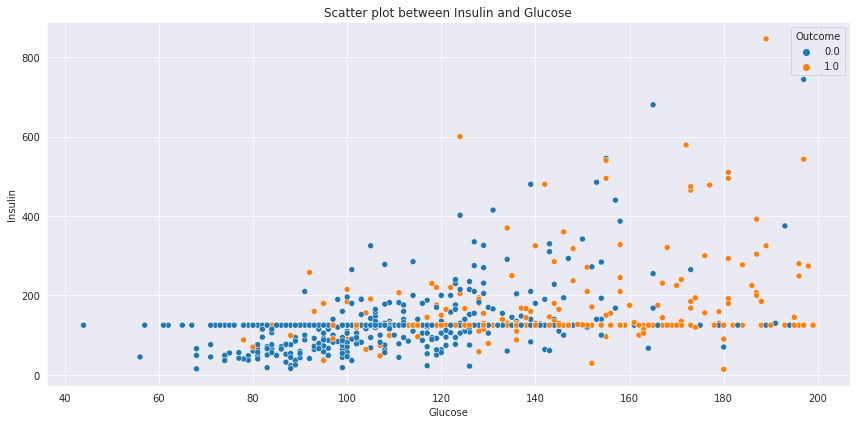

In [31]:
# scatter plot between glucose and insulin
sns.scatterplot(x= "Glucose", y= "Insulin", hue = "Outcome", data = diabetes_data)
plt.title("Scatter plot between Insulin and Glucose")
plt.grid(True)

From the scatter plot of Insulin vs Glucose, we can see that Insulin increases as Glucose increases and **Diabetic outcomes(Outcome - 1.0) tend to have higher Glucose compared to Non-Diabetic outcomes(Outcome - 0.0)**

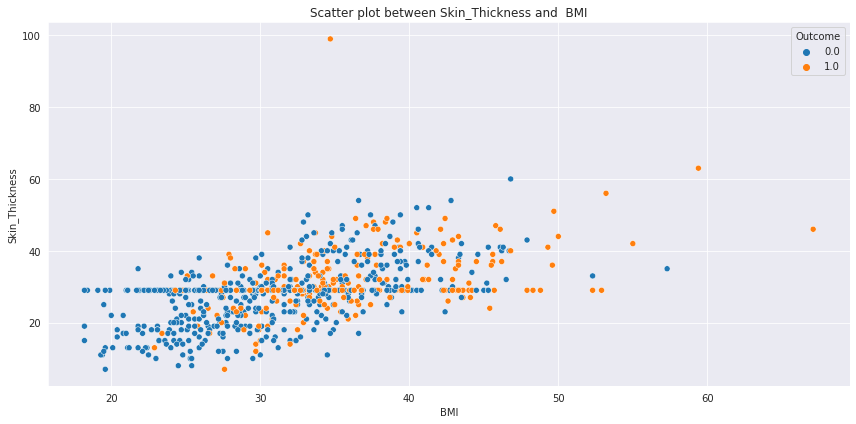

In [32]:
# scatter plot between Skin_Thickness and  BMI
sns.scatterplot(x= "BMI", y= "Skin_Thickness", hue = "Outcome", data = diabetes_data)
plt.title("Scatter plot between Skin_Thickness and  BMI")
plt.grid(True)

From the scatter plot of Skin_Thickness and  BMI, we can see that Skin_Thickness increases as BMI increases and **Diabetic outcomes(Outcome - 1.0) tend to have higher BMI compared to Non-Diabetic outcomes(Outcome - 0.0)**

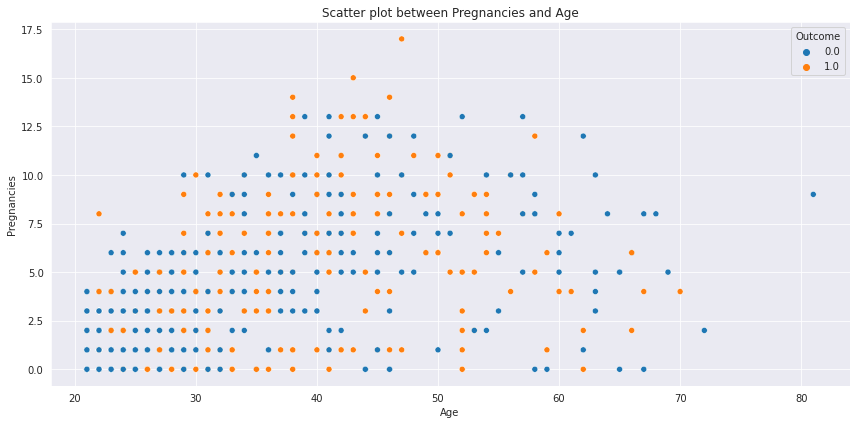

In [33]:
# scatter plot between Pregnancies and Age
sns.scatterplot(x= "Age", y= "Pregnancies", hue = "Outcome", data = diabetes_data)
plt.title("Scatter plot between Pregnancies and Age")
plt.grid(True)

No clear pattern is observed

### **IV. EDA SUMMARY**

After doing Exploratory Data Analysis, we can say that:

- In outcome column we have: **268 diabetic (1.0) and 500 Non-diabetic (0.0) outcomes**

- Insulin is positively correlated with Glucose. **As Glucose increases, Insulin also increases** or vice-versa.

- Pregnancies is positively correlated with age. **As Age increases, pregnancies increases**.

- Skin thickness is positively correlated with BMI. **As BMI increases, Skin Thickness also increases** or vice-versa.

- **Diabetic outcomes have higher median Pregnancies, Glucose, Skin_Thickness, Insulin, BMI, Diabetes_Pedigree_Function, Age  than non-diabetic outcomes, except Blood_Pressure** which is almost similar for both outcomes.

## **FEATURE ENGINEERING**

### **I. FEATURE SCALING**

In [34]:
# selecting all columns except last column("Outcome") as dependent variables
X=diabetes_data.iloc[:,0:8]

# selecting "Outcome" column as target variable
Y=diabetes_data.iloc[:,8]

# performing preprocessing part
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X = sc.fit_transform(X)

In [35]:
X

array([[ 0.63994726,  0.86604475, -0.03351824, ...,  0.16661938,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20506583, -0.52985903, ..., -0.85219976,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.01666174, -0.69530596, ..., -1.33250021,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.02157407, -0.03351824, ..., -0.910418  ,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14279979, -1.02619983, ..., -0.34279019,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94206766, -0.19896517, ..., -0.29912651,
        -0.47378505, -0.87137393]])

We wont transform Y, because 'Outcome' variable is already in scale (it only has 2 values - 0.0, 1.0)

### **II. FEATURE EXTRACTION**

Principal component analysis, or PCA, is a statistical procedure that allows you to summarize the information content in large data tables by means of a smaller set of “summary indices” that can be more easily visualized and analyzed.

In [36]:
from sklearn.decomposition import PCA
pca=PCA()
fit=pca.fit(X)

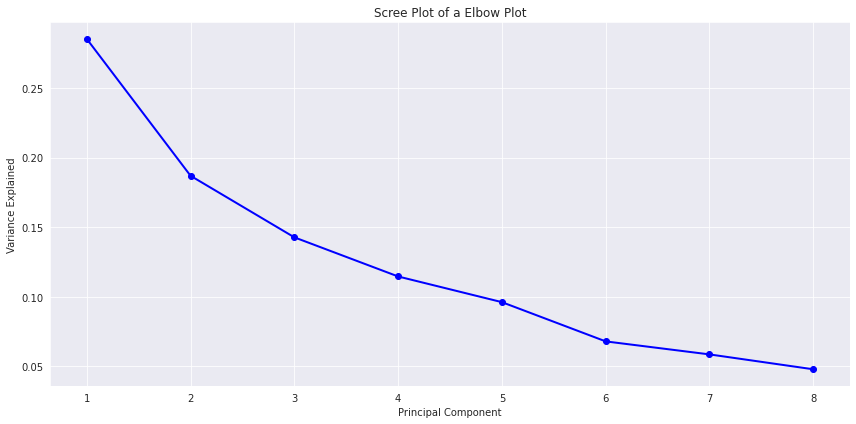

In [37]:
import matplotlib.pyplot as plt
import numpy as np

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot of a Elbow Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

**Kink in the elbow plot is observed with respect to PCA 2** as there is a huge drop in variance observed from PCA1 TO PCA2

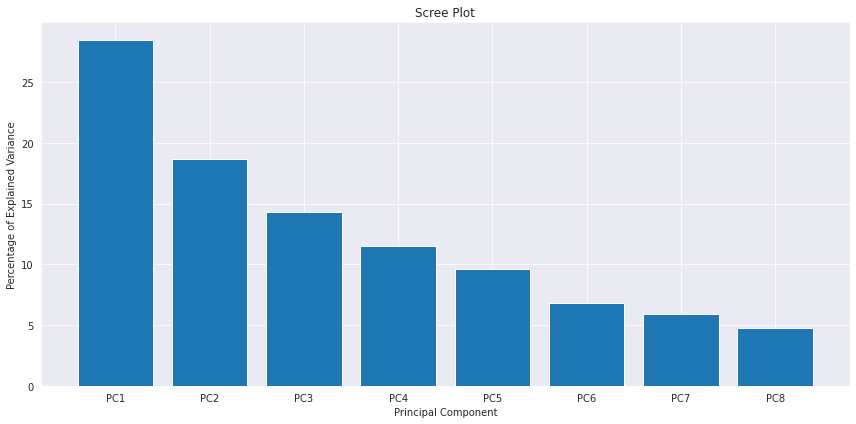

In [38]:
# Representation of Explained Variance as bar plot
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
 
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

In [39]:
# lookin at the Variance values 
pca.explained_variance_ratio_

array([0.285334  , 0.18694735, 0.14271321, 0.11457327, 0.09611288,
       0.06790585, 0.05855461, 0.04785884])

Since kink is observed with respect to PCA 2, we will do PCA upto PCA 2 by setting n_components to 2

In [40]:
pca=PCA(n_components=2)
fit=pca.fit(X)

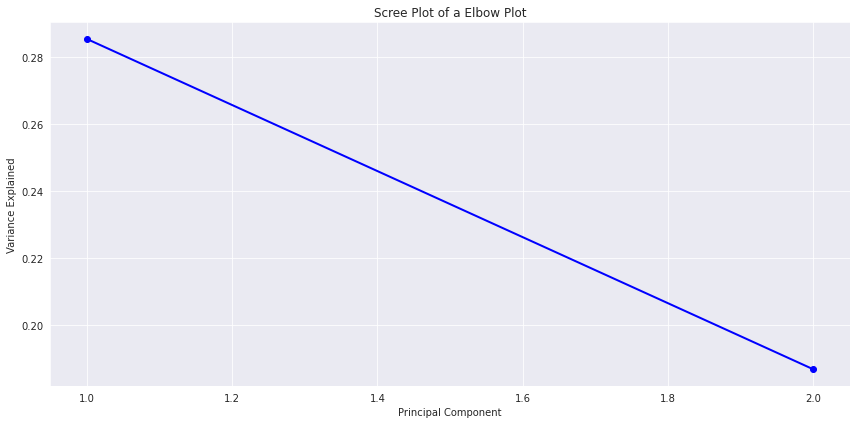

In [41]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot of a Elbow Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [42]:
# transforming the PCA data to give to ML model
#Transforming x_train 
x_data = pca.transform(X)
x_data

array([[ 1.44896408, -0.6595531 ],
       [-1.49941589,  0.07642334],
       [ 0.4227583 , -0.76083967],
       ...,
       [-0.87636211, -0.88773374],
       [-0.38572591, -0.23087916],
       [-1.23024038,  0.65422286]])

In [43]:
# adding constant to the PCA data to be given to ML model
import statsmodels.api as sm
sm.add_constant(x_data)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


array([[ 1.        ,  1.44896408, -0.6595531 ],
       [ 1.        , -1.49941589,  0.07642334],
       [ 1.        ,  0.4227583 , -0.76083967],
       ...,
       [ 1.        , -0.87636211, -0.88773374],
       [ 1.        , -0.38572591, -0.23087916],
       [ 1.        , -1.23024038,  0.65422286]])

Since our dataset will be used to predict whether a person has Diabetes or not, that is a yes/no answer which will be given by a classification model.

For a classification model, better approach would be to use Linear Discriminate Analysis (LDA)

In [44]:
# Applying LDA(Linear Discriminate Analysis) to the data
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X, Y)
yp= lda.predict(X)
yp

array([1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1.,
       1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1.,
       1., 0., 1., 0., 0.

## **CONCLUSION**

In conclusion, we can say that:
- In outcome column we have: **268 diabetic (1.0) and 500 Non-diabetic (0.0) outcomes**

- Insulin is positively correlated with Glucose. **As Glucose increases, Insulin also increases** or vice-versa.

- Pregnancies is positively correlated with age. **As Age increases, pregnancies increases**.

- Skin thickness is positively correlated with BMI. **As BMI increases, Skin Thickness also increases** or vice-versa.

- **Diabetic outcomes have higher median Pregnancies, Glucose, Skin_Thickness, Insulin, BMI, Diabetes_Pedigree_Function, Age  than non-diabetic outcomes, except Blood_Pressure** which is almost similar for both outcomes.

- Dataset will be used to predict whether a person has Diabetes or not, classification model will be developed from this dataset, for which **Linear Discriminate Analysis (LDA) would be the best method for feature extraction**.